# SVM

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv(r"C:\Users\vishn\OneDrive\Desktop\doc\SVM\SVM\mushroom.csv")

In [ ]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
df.shape

(2000, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
for i in df.columns:
     print(f'{i}  {df[i].nunique()}')

Unnamed: 0  976
cap_shape  5
cap_surface  4
cap_color  9
bruises  2
odor  9
gill_attachment  4
gill_spacing  3
gill_size  2
gill_color  12
stalk_shape  2
stalk_root  7
stalk_surface_above_ring  4
stalk_surface_below_ring  4
stalk_color_above_ring  9
stalk_color_below_ring  9
veil_type  2
veil_color  4
ring_number  3
ring_type  8
spore_print_color  9
population  6
habitat  7
class  2
stalk_height  973
cap_diameter  976


In [ ]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [ ]:
df=df.drop(columns=['Unnamed: 0'],axis=1)


In [ ]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


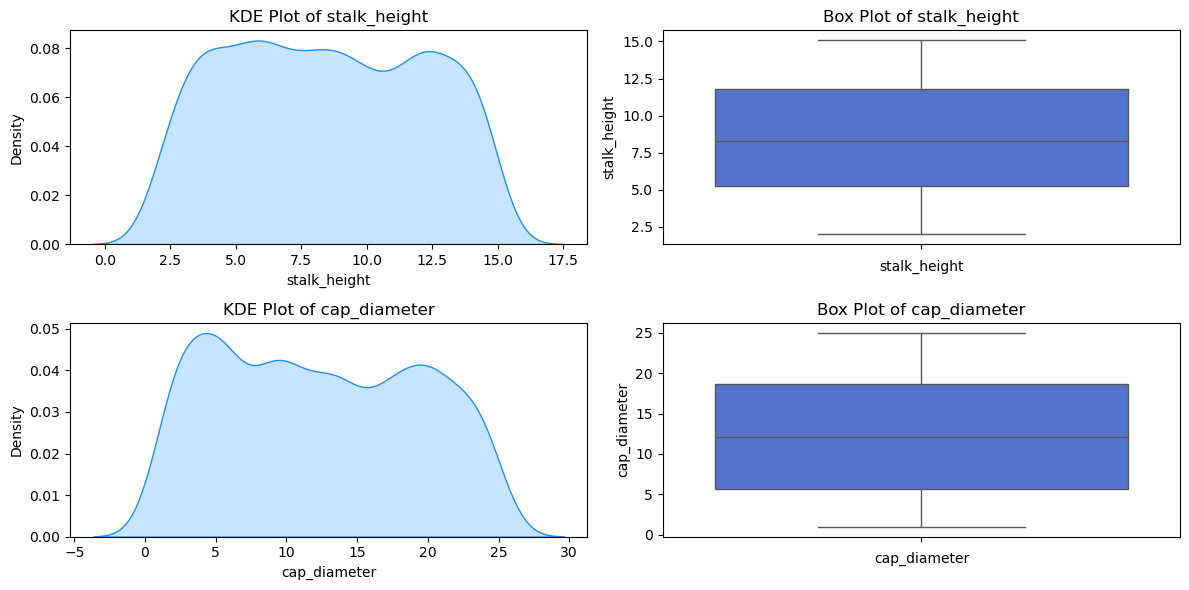

In [ ]:
numerical_columns=['stalk_height','cap_diameter']
fig,axes=plt.subplots(len(numerical_columns),2,figsize=(12,len(numerical_columns)*3))
for  i, fe in enumerate(numerical_columns):
    sns.kdeplot(df[fe],ax=axes[i,0],fill=True,color='dodgerblue')
    axes[i, 0].set_title(f'KDE Plot of {fe}')
    axes[i, 0].set_xlabel(fe)
    axes[i, 0].set_ylabel('Density')
    sns.boxplot(df[fe],ax=axes[i, 1], color='Royalblue')
    axes[i, 1].set_title(f'Box Plot of {fe}')
    axes[i, 1].set_xlabel(fe)
plt.tight_layout()

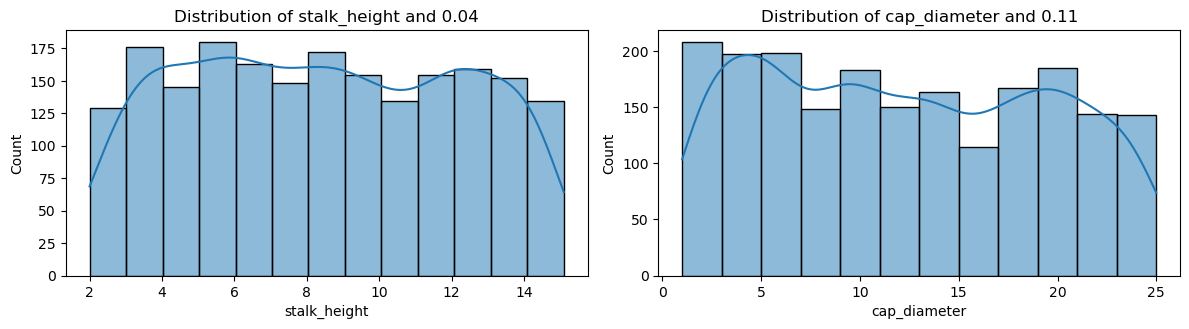

In [ ]:
plt.figure(figsize=(12, len(numerical_columns) * 3))
for i,fe in enumerate(numerical_columns,1):
    plt.subplot(len(numerical_columns),2,i)
    sns.histplot(df[fe],kde=True)
    plt.title(f'Distribution of {fe} and {round(df[fe].skew(),2)}')


plt.tight_layout()
plt.show()

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
cap_shape,2000,5,sunken,439
cap_surface,2000,4,scaly,568
cap_color,2000,9,brown,263
bruises,2000,2,yes,1023
odor,2000,9,foul,274
gill_attachment,2000,4,free,540
gill_spacing,2000,3,distant,677
gill_size,2000,2,narrow,1007
gill_color,2000,12,orange,216
stalk_shape,2000,2,enlarging,1040


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Create a DataFrame to store Cramér's V values
categorical_columns = df.select_dtypes(include='object').columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Compute Cramér's V for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to numeric for better visualization
cramers_v_matrix = cramers_v_matrix.astype(float)

# Display the Cramér's V matrix
print(cramers_v_matrix)


                          cap_shape  cap_surface  cap_color   bruises  \
cap_shape                  1.000000     0.070667   0.104102  0.061673   
cap_surface                0.070667     1.000000   0.099275  0.052096   
cap_color                  0.104102     0.099275   1.000000  0.079223   
bruises                    0.061673     0.052096   0.079223  0.998999   
odor                       0.118000     0.098458   0.110888  0.097290   
gill_attachment            0.067099     0.068040   0.083503  0.050578   
gill_spacing               0.081174     0.057769   0.102902  0.036261   
gill_size                  0.053318     0.061105   0.121678  0.040851   
gill_color                 0.134512     0.142503   0.137240  0.146172   
stalk_shape                0.082136     0.029711   0.115312  0.006927   
stalk_root                 0.100244     0.104878   0.126044  0.046013   
stalk_surface_above_ring   0.078411     0.067573   0.118788  0.046157   
stalk_surface_below_ring   0.056226     0.065816   

In [ ]:
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

#  Data Preprocessing

In [ ]:

X=df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat',
       'stalk_height', 'cap_diameter']]
y=df['class']

In [ ]:
X.shape


(2000, 24)

In [ ]:
y.shape

(2000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

In [ ]:
le = LabelEncoder()

# Fit and transform the training data
X_train['bruises'] = le.fit_transform(X_train['bruises'])

# Transform the test data using the same encoder
X_test['bruises'] = le.transform(X_test['bruises'])

In [ ]:
ordinal_cols=['bruises']
nominal_cols=['cap_shape', 'cap_surface', 'cap_color', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'
       ]
numerical_cols=['stalk_height', 'cap_diameter']

In [ ]:
pr = ColumnTransformer(
    transformers=[

        ('onehot', OneHotEncoder(drop='first',sparse_output=False), nominal_cols),
        ('scaler', StandardScaler(), numerical_cols)

    ],
    remainder='passthrough'
)


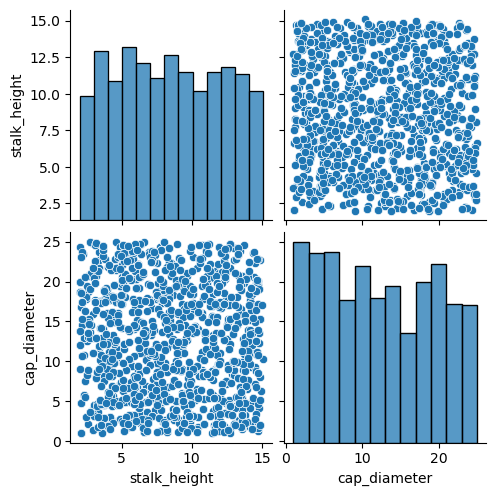

In [ ]:
sns.pairplot(df)

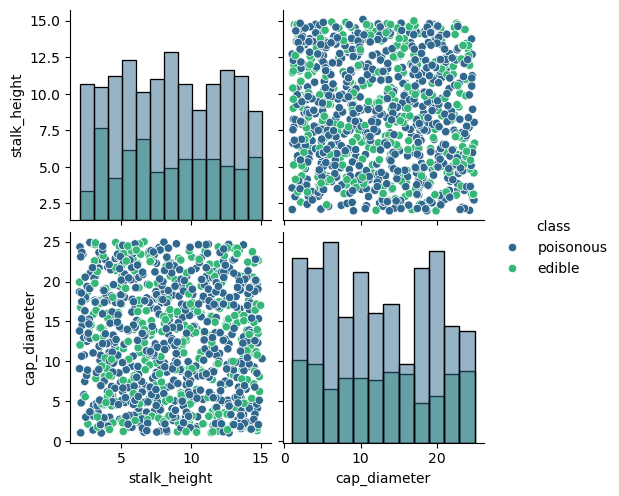

In [ ]:
sns.pairplot(df,hue='class',palette='viridis', diag_kind='hist')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


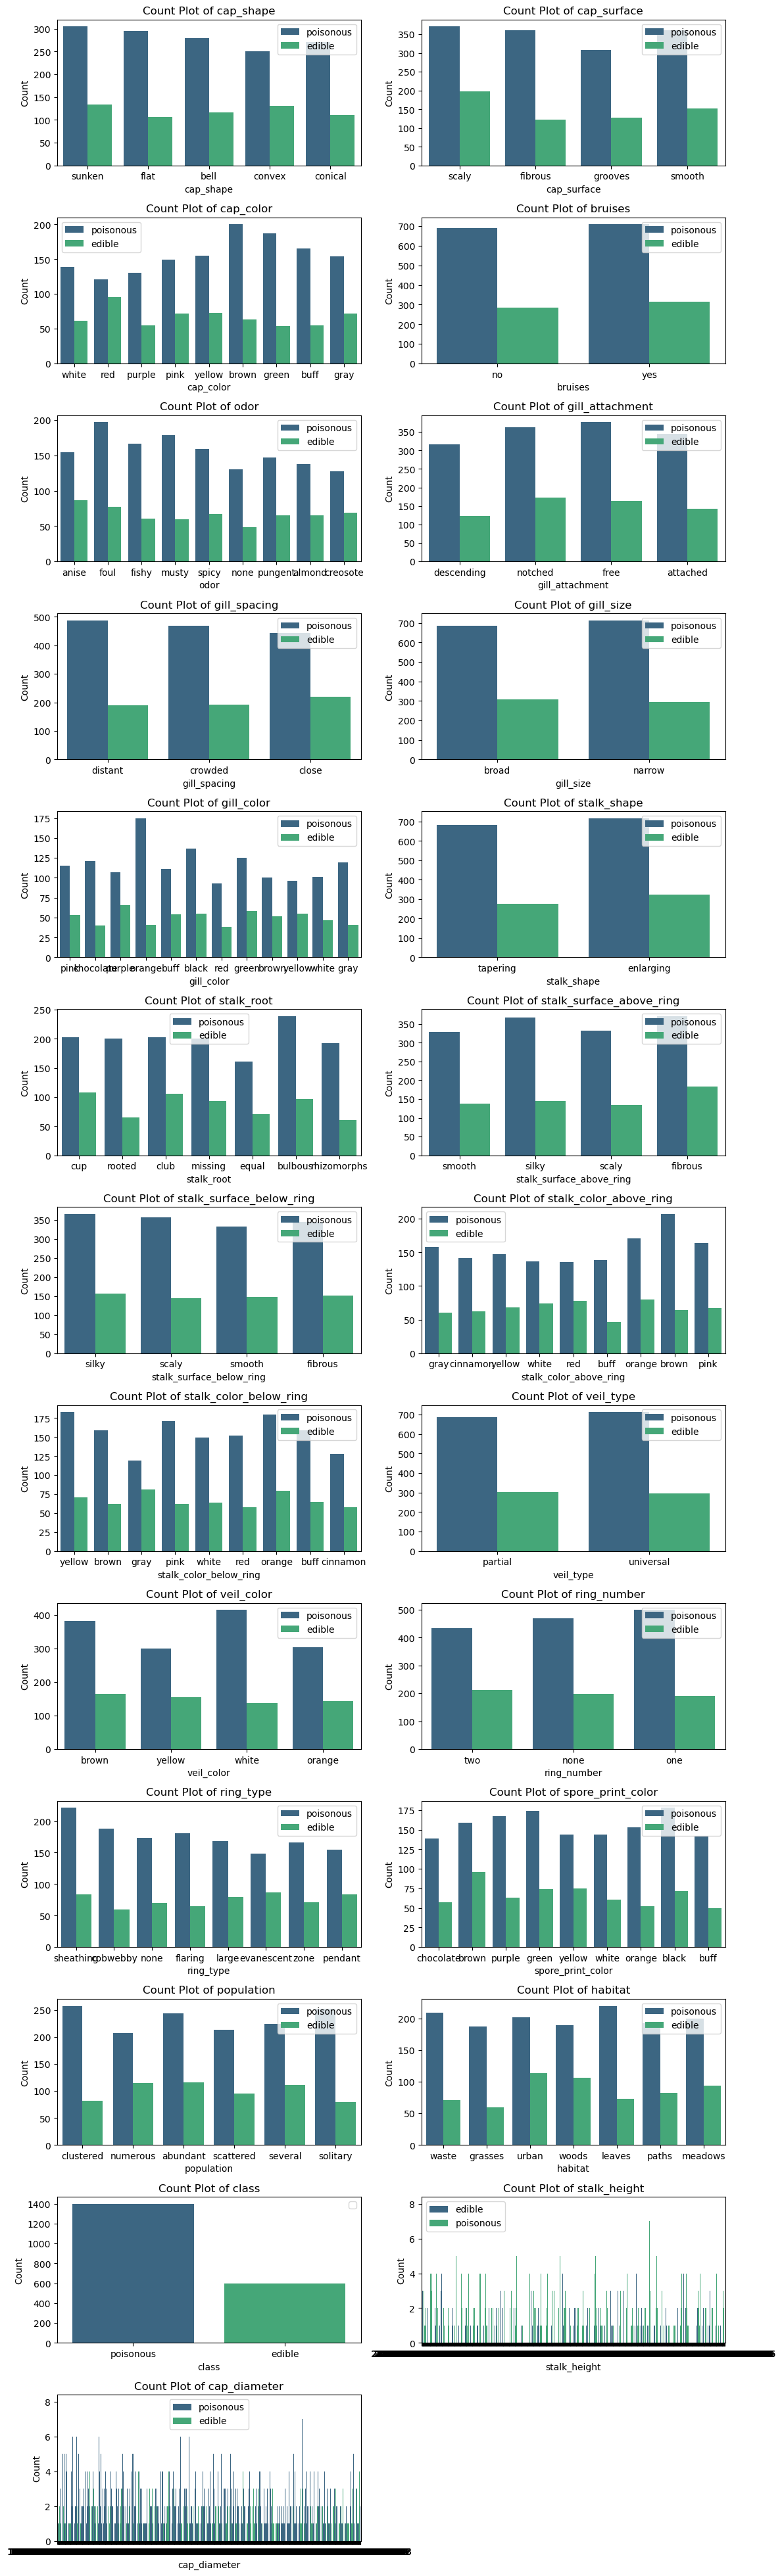

In [ ]:
plt.figure(figsize=(12,len(df.columns)*3))
for i,cat_feature in  enumerate(df.columns,1):
    plt.subplot(len(df.columns),2,i)
    sns.countplot(data=df, x=cat_feature, hue='class', palette='viridis',color='count',)
    plt.title(f'Count Plot of {cat_feature}')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

C:\Users\vishn\AppData\Local\Temp\ipykernel_12184\919443228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='viridis')


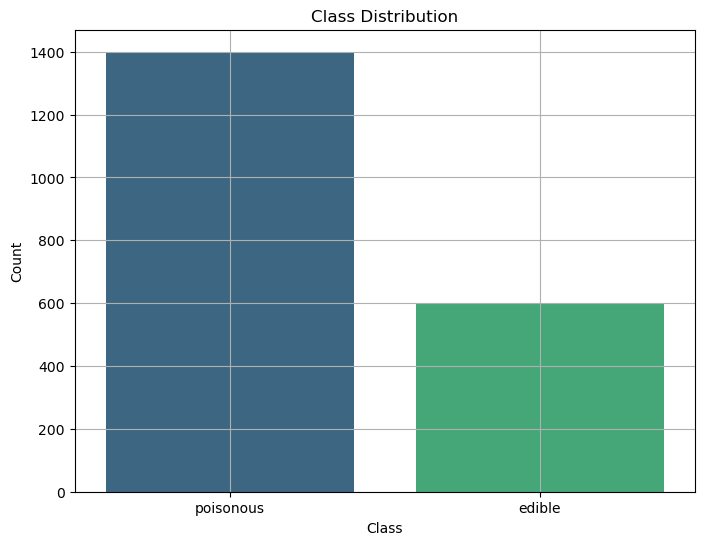

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'class' is your target column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [ ]:
X_train=pr.fit_transform(X_train)
X_test=pr.transform(X_test)

# SVM Implementation

In [ ]:
from sklearn.svm import SVC
svc=SVC(probability=True)

svc.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
y_pred=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,recall_score,precision_score,precision_recall_curve,PrecisionRecallDisplay

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

      edible       0.99      0.43      0.60       159
   poisonous       0.79      1.00      0.88       341

    accuracy                           0.82       500
   macro avg       0.89      0.72      0.74       500
weighted avg       0.85      0.82      0.79       500

[[ 69  90]
 [  1 340]]


# Visualization of SVM Results

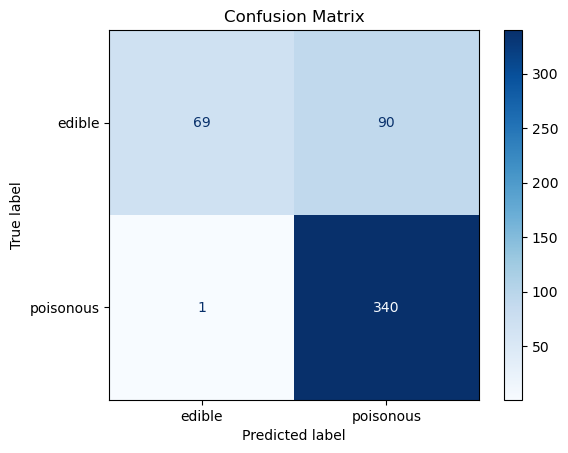

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Assuming `model` is your trained SVM and `X_test`, `y_test` are your test data


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


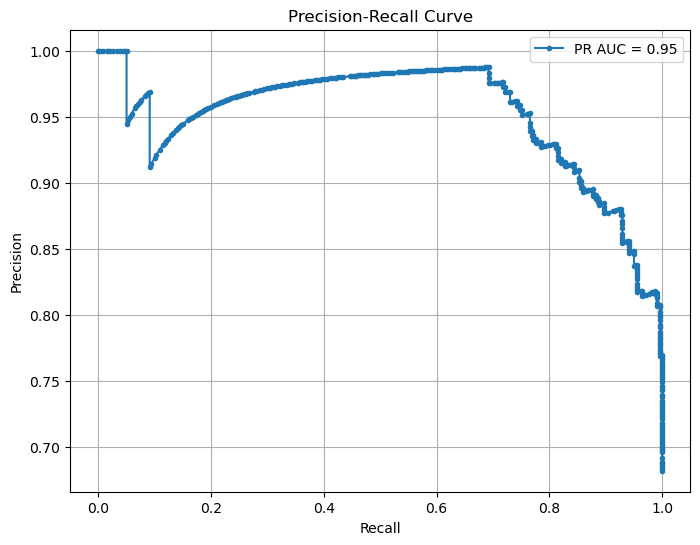

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
pos_label = 'poisonous'

# Assuming y_probs are the predicted probabilities
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=pos_label)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# Parameter Tuning and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={ 'C':[0.1,1,10,100,1000],
            'kernel':[ 'poly', 'rbf'],
             "gamma":[1,0.1,0.01,0.001,0.0001]
}

In [ ]:
grid=GridSearchCV(SVC(probability=True),param_grid=param_grid,refit=True,verbose=3,)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.840 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.843 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.837 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.820 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.823 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.803 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf']},
             verbose=3)

In [ ]:
grid.best_params_


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=1, gamma=1, probability=True)

In [ ]:
y_pre=grid.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

              precision    recall  f1-score   support

      edible       1.00      0.64      0.78       159
   poisonous       0.85      1.00      0.92       341

    accuracy                           0.88       500
   macro avg       0.93      0.82      0.85       500
weighted avg       0.90      0.88      0.88       500

[[101  58]
 [  0 341]]


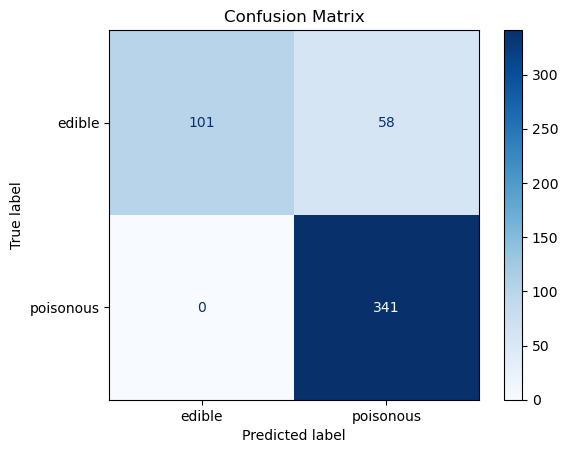

In [ ]:
cv=confusion_matrix(y_test,y_pre,labels=grid.classes_)
di=ConfusionMatrixDisplay(confusion_matrix=cv,display_labels=grid.classes_)
di.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

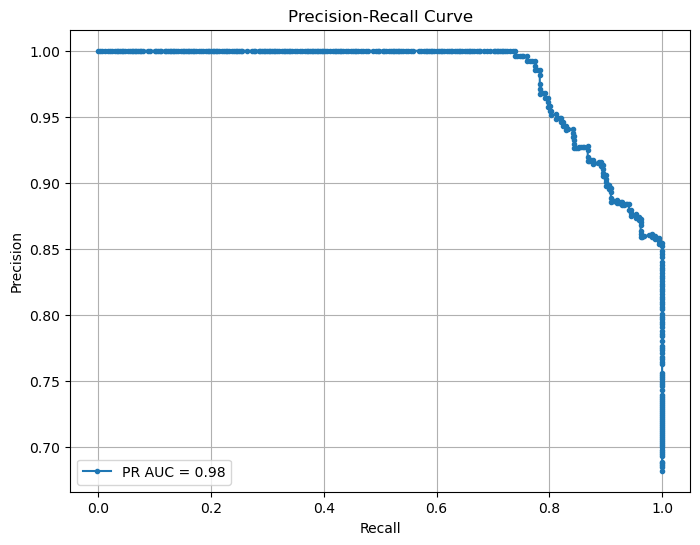

In [ ]:
y_pro=grid.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve, auc
pos_label = 'poisonous'

# Assuming y_probs are the predicted probabilities
precision, recall, _ = precision_recall_curve(y_test, y_pro, pos_label=pos_label)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# for linaer kernal it taking to much time and also and acuracy is very low
 # for poly and  rbf  kernal gives almost same `but a litle rbf gives better perfrormance

# SVM is a powerful algorithm for the Mushroom dataset, especially due to its ability to handle high-dimensional data and find non-linear decision boundaries.
# However, its strengths come with challenges such as computational cost, sensitivity to parameter selection, and limited interpretability. These factors should be considered when choosing SVM for this dataset, and proper preprocessing, parameter tuning, and validation techniques are crucial to leveraging its full potential.

Healthcare: SVMs are used in medical diagnosis systems, where high-dimensional features from medical imaging can be effectively classified to aid in disease detection. However, the need for interpretability may necessitate supplementary methods.

Finance: In fraud detection, SVMs can identify patterns in high-dimensional transaction data. Yet, the computational cost might be a concern for real-time detection systems.

Text Classification: SVMs are effective in natural language processing tasks like spam detection or sentiment analysis, where text data can be transformed into high-dimensional feature spaces using techniques like TF-IDF.

Bioinformatics: SVMs are often employed in gene expression classification, where the data involves thousands of features. The ability to handle high-dimensional data is a major advantage here, though the interpretability remains a challenge.